In [1]:
# import all the necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

In [2]:
df = pd.read_csv(r"C:\Users\raval\Downloads\AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: >

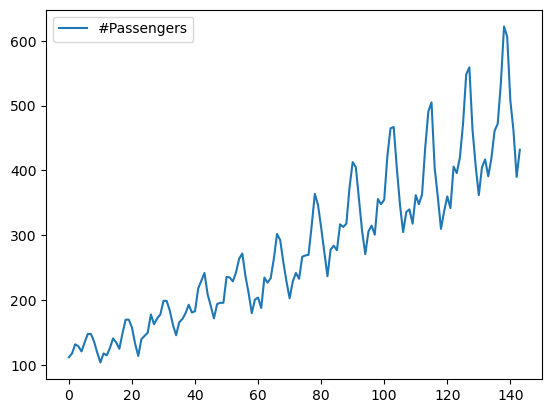

In [3]:
df.plot()

In [4]:
df["Month"]=pd.to_datetime(df["Month"])

In [5]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


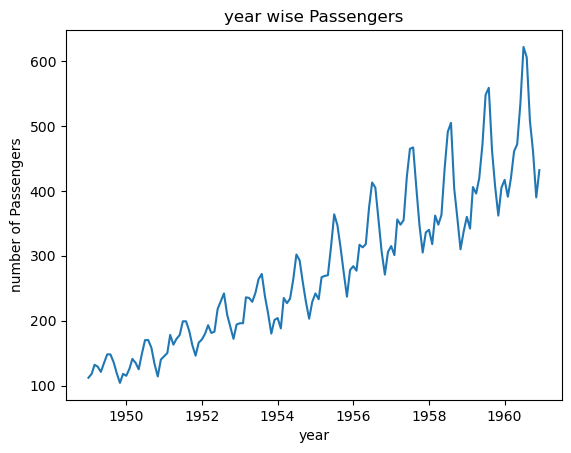

In [6]:
plt.plot(df.Month,df["#Passengers"])
plt.xlabel("year")
plt.ylabel("number of Passengers")
plt.title("year wise Passengers")
plt.show()

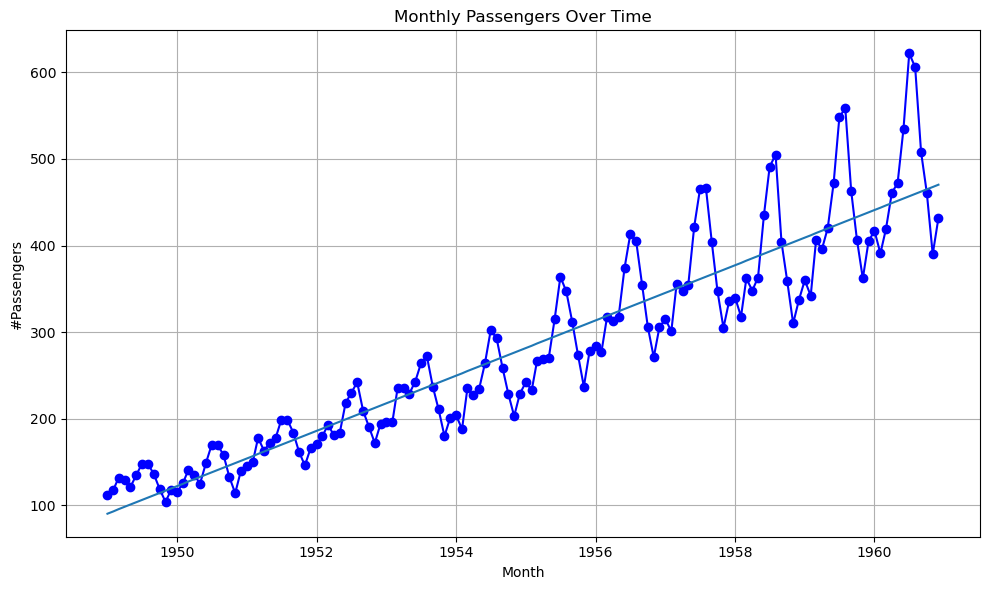

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['#Passengers'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('Monthly Passengers Over Time')

# # Add notations for each data point
# for i, row in df.iterrows():
#     plt.text(row['Month'], row['#Passengers'], str(row['#Passengers']), ha='center', va='bottom')

# Fit and plot the trend line
coefficients = np.polyfit(range(len(df)), df['#Passengers'], 1)
trend_line = np.poly1d(coefficients)
plt.plot(df['Month'], trend_line(range(len(df))))

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

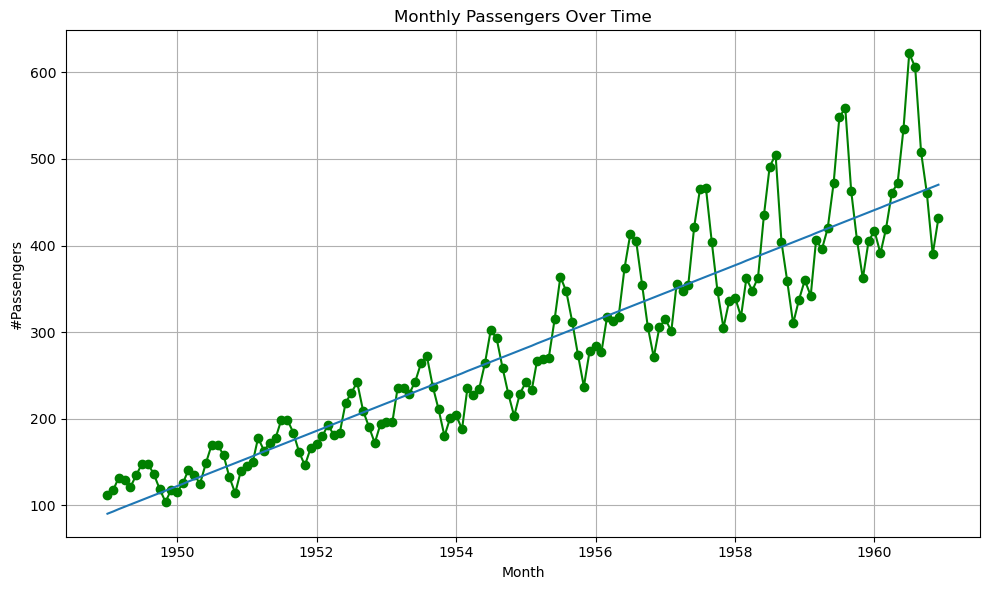

In [8]:
# Plot the data with a specific color
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['#Passengers'], marker='o', linestyle='-', color='green')  # Change color to green

# Add labels and title
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('Monthly Passengers Over Time')

# Fit and plot the trend line
coefficients = np.polyfit(range(len(df)), df['#Passengers'], 1)
trend_line = np.poly1d(coefficients)
plt.plot(df['Month'], trend_line(range(len(df))))

# Display the plot without notations for each data point
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
df.index = pd.to_datetime(df['Month'])

In [10]:
df.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [11]:
del df['Month']

In [15]:
df.tail(17)

,#Passengers
Month,
1959-08-01,559
1959-09-01,463
1959-10-01,407
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461


In [19]:
train = df[df.index <= pd.to_datetime("1959-08-01", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("1959-08-01", format='%Y-%m-%d')]

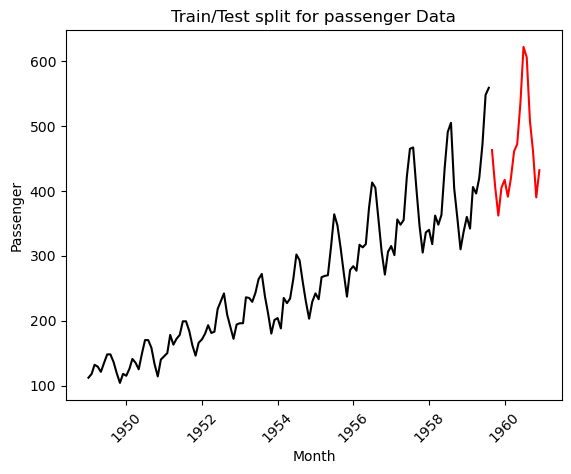

In [20]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Passenger')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.title("Train/Test split for passenger Data")
plt.show()

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
y = train['#Passengers']

In [22]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
ARMAmodel = ARMAmodel.fit()

C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [24]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

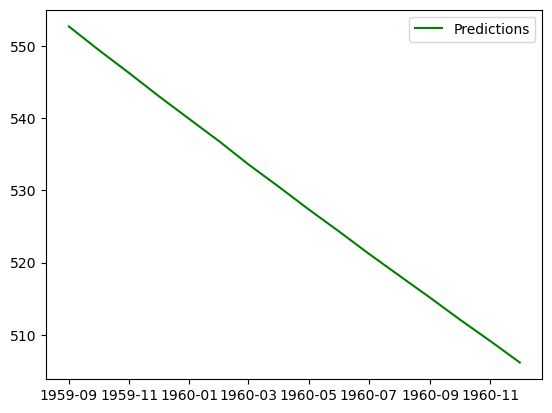

In [25]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["#Passengers"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  105.79146987510961


In [27]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE:  139.620453262214


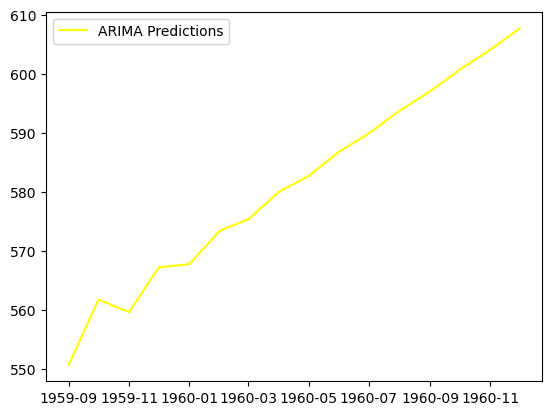

In [28]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["#Passengers"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [29]:
!pip install pmdarima

                                              0.0/614.7 kB ? eta -:--:--
                                              10.2/614.7 kB ? eta -:--:--
     -                                     30.7/614.7 kB 330.3 kB/s eta 0:00:02
     ---                                   61.4/614.7 kB 365.7 kB/s eta 0:00:02
     ----                                  71.7/614.7 kB 328.6 kB/s eta 0:00:02
     ------                               112.6/614.7 kB 437.6 kB/s eta 0:00:02
     --------                             153.6/614.7 kB 510.2 kB/s eta 0:00:01
     -------------                        235.5/614.7 kB 686.8 kB/s eta 0:00:01
     -----------------                    307.2/614.7 kB 827.2 kB/s eta 0:00:01
     --------------------                 358.4/614.7 kB 827.0 kB/s eta 0:00:01
     ---------------------                368.6/614.7 kB 820.1 kB/s eta 0:00:01
     ---------------------                368.6/614.7 kB 820.1 kB/s eta 0:00:01
     -----------------------              409.6/614.7

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [30]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1177.355, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1224.369, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1216.260, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1213.711, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1224.160, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1207.907, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.959 seco